In [2]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as ptr
from sklearn.linear_model import LinearRegression

In [3]:
data= pd.read_csv('homeprices.csv')
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
data.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


In [5]:
data.info() #check for any null value in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


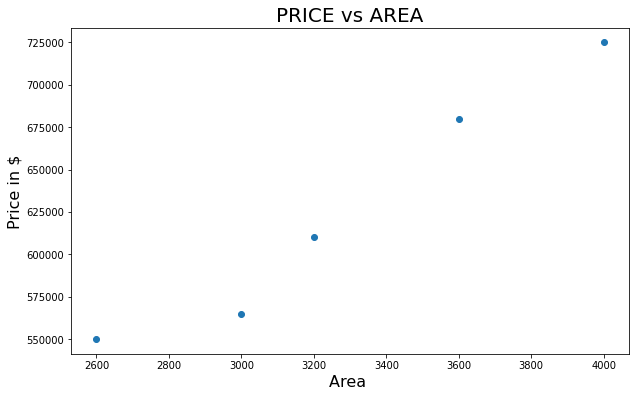

In [6]:
x= DataFrame(data= data, columns= ['area'])
y= DataFrame(data= data, columns= ['price'])

ptr.figure(figsize=(10, 6))
ptr.title('PRICE vs AREA', fontsize= 20)
ptr.xlabel('Area ', fontsize= 16)
ptr.ylabel('Price in $', fontsize= 16)
ptr.scatter(x, y)
ptr.show()



w : 135.78767123287673
c : 180616.43835616432


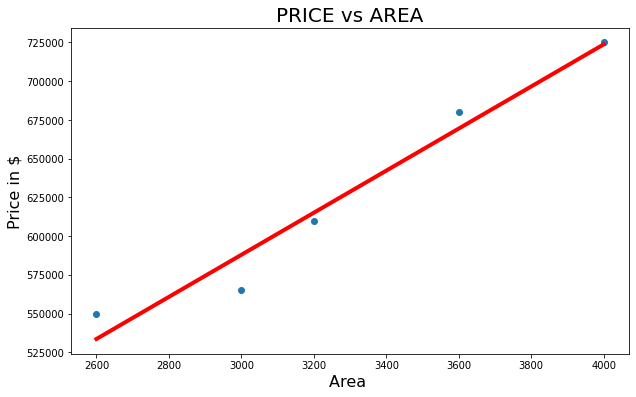

In [7]:
#lets do regression
regression= LinearRegression().fit(x, y)
#y= wx  + c

w= regression.coef_[0][0]
c= regression.intercept_[0]

print('w :', w)
print('c :' , c)

#plot the linear regression line along with the scatter plot
 
ptr.figure(figsize=(10, 6))
ptr.title('PRICE vs AREA', fontsize= 20)
ptr.xlabel('Area ', fontsize= 16)
ptr.ylabel('Price in $', fontsize= 16)
ptr.scatter(x, y)
ptr.plot(x, regression.predict(x), linewidth= 4, color= "red")
ptr.show()




In [8]:
#i want to see the see predict the prices for all the area present in the areas csv file
area= pd.read_csv('areas.csv')

# i want to add a extra column of predition in the areas file

predictions= regression.predict(area)

area['price']= predictions # adding a extra column in the areas file

#you can also create a entirely new file

area.to_csv('predictions.csv', index= False) #converting the dataframe into a csv file


area


,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


Exercise
#### CANADA PER CAPITA INCOME
###### Predict the per capita for the year 2020

In [10]:
per_capita_data= pd.read_csv('canada_per_capita_income.csv')
per_capita_data.head() #if we want to look just a few values from the start

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [32]:
x= DataFrame(data= per_capita_data, columns=['year'])
y= DataFrame(data= per_capita_data, columns=['per capita income (US$)'])

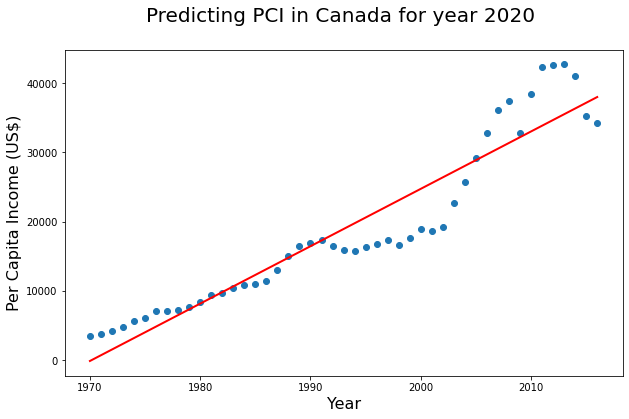

The Per capita Income prediction for year 2020 is 41288.6941 $


In [55]:
ptr.figure(figsize=(10, 6))

ptr.xlabel('Year', fontsize= 16)
ptr.ylabel('Per Capita Income (US$)', fontsize= 16)
ptr.title('Predicting PCI in Canada for year 2020 \n', fontsize= 20)
ptr.scatter(x, y)
reg= LinearRegression().fit(x, y)
ptr.plot(x, reg.predict(x), color="red", linewidth= 2)
ptr.show()

w= reg.coef_[0][0]
c= reg.intercept_[0]

print('The Per capita Income prediction for year 2020 is', round(w * 2020 + c, 4),'$')


